# **PROJECT 2**
# EDA  - Body performance analytics
<div>
<img src="https://github.com/Matan97/Project1/blob/8fb2d579b0246463ee5e842307de3a6c76fb69e6/body%20prformance%20logo.jpg?raw=true" width="350"/>
</div>

### STUDENTS:


#### - Gal Leibovich
#### - Ariel Baba
#### - Matan Asscher
#### - Amit Mirzayev

- [Data source](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Introduction:
#### The data we have examined was obtained from the Korea Sports Promotion Foundation.  This dataset presents a categorization of physical fitness, considering factors such as age, gender, weight, height, and other relevant variables that may impact an individual's performance.

In [2]:
url = 'https://raw.githubusercontent.com/Matan97/Project1/main/bodyPerformance111.csv'
df = pd.read_csv(url)
df.sample(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
675,29.0,M,184.3,89.50,17.8,77.0,127.0,54.7,21.7,54.0,234.0,B
2010,21.0,F,149.9,48.40,31.2,65.0,117.0,22.5,23.0,42.0,162.0,A
1512,23.0,F,168.1,57.30,27.5,64.0,116.0,17.5,-7.2,29.0,126.0,D
9037,44.0,M,169.4,70.72,19.6,70.0,111.0,44.3,14.3,40.0,221.0,B
9432,28.0,M,173.9,64.70,15.1,79.0,123.0,41.0,5.4,41.0,237.0,C


In [3]:
df.shape

(13393, 12)

## Data description
 - age : 20~64
 - gender : F/M
 - height_cm 
 - weight_kg
 - body fat_%
 - diastolic : diastolic blood pressure (min)
 - systolic : systolic blood pressure (min)
 - gripForce : measured by a dedicated device
 - sit and bend forward_cm : lower back flexibility test
  - sit-ups counts : measures abdominal strength
  - broad jump_cm : measures explosive leg power
  - class : A/B/C/D (A - best)

<div>
<img src="https://github.com/Matan97/Project1/blob/main/WhatsApp%20Image%202023-06-08%20at%2012.54.26.jpeg?raw=true" width="500"/>
</div>


# 1. Wrangling data


In [4]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

We need to change the 'class' column to a numeric type so that we can search for correlations later on.

In [5]:
df['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [6]:
ans= ['D', 'C','B','A']
df= df.replace(ans, [4,3,2,1])
df['class'].unique()

array([3, 1, 2, 4], dtype=int64)

A=1 best. 

In [7]:
df.isnull().sum().sort_values(ascending=False)

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Luckily there are no missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 1.2+ MB


In [9]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,2.500187
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,1.118109
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,1.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,2.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,3.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,4.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000,4.000000


In [10]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

#### Treat the outliers:

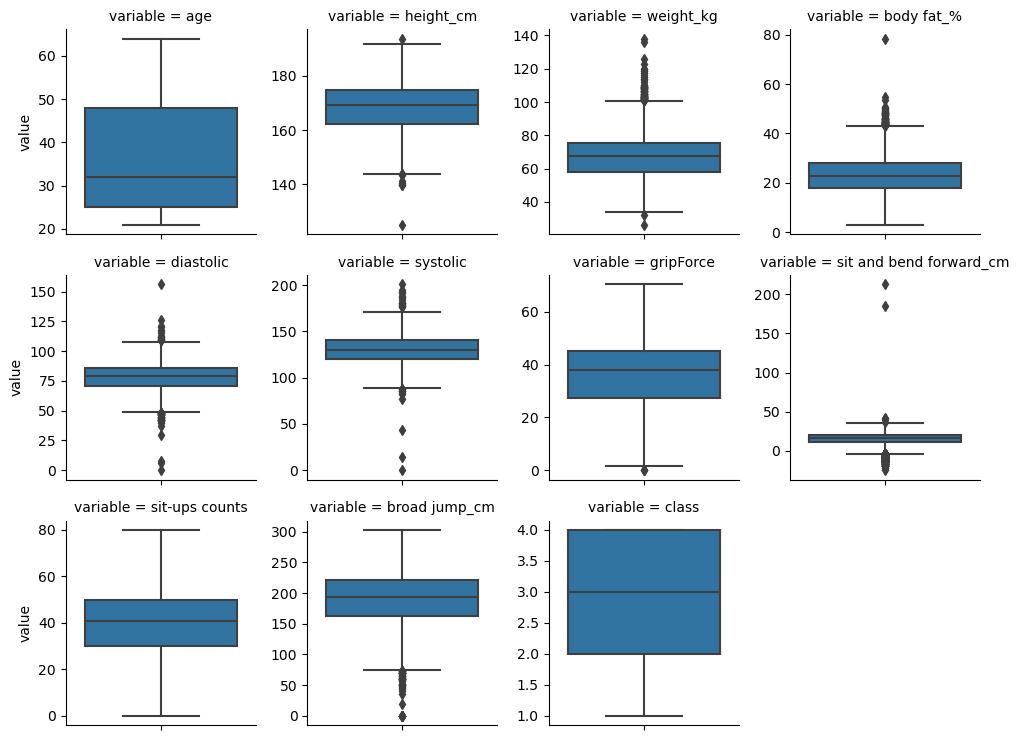

In [11]:
features = ['age', 'gender', 'height_cm',
       'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm',
       'sit-ups counts', 'broad jump_cm', 'class']
       
melted_df = pd.melt(df[features], id_vars = 'gender', value_vars = features)
g = sns.FacetGrid(data = melted_df, col="variable",  col_wrap=4, height=2.5 , sharey = False , sharex = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

In [12]:
df[df['broad jump_cm']<20]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
484,22.0,F,167.4,66.2,34.0,62.0,110.0,28.5,11.2,38.0,0.0,3
712,58.0,M,168.7,76.1,27.5,84.0,139.0,34.5,2.0,0.0,0.0,4
1919,59.0,F,162.9,61.0,32.6,82.0,123.0,29.7,19.5,0.0,0.0,4
4756,28.0,M,176.6,82.2,20.7,83.0,126.0,40.9,17.6,46.0,0.0,3
4900,60.0,F,162.2,67.3,41.8,47.0,131.0,22.1,19.5,0.0,0.0,4
7366,50.0,M,178.2,88.4,23.4,85.0,146.0,54.9,19.3,51.0,0.0,3
7721,56.0,F,156.0,51.1,28.4,73.0,113.0,20.7,23.0,23.0,0.0,3
7944,45.0,F,153.4,33.7,16.1,81.0,124.0,6.7,11.5,8.0,0.0,4
7954,61.0,F,153.0,64.6,31.4,77.0,152.0,14.0,20.6,0.0,0.0,4
8599,60.0,F,160.0,76.9,50.3,82.0,141.0,20.1,-8.1,0.0,0.0,4


Jump forward - an unusual and small sample that did not report there score propebly.

In [13]:
df[(df['body fat_%']>54) | (df['body fat_%']<4) ]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
460,24.0,M,170.6,69.90,3.0,75.0,123.0,52.40,23.9,60.0,280.0,1
735,21.0,M,177.6,74.50,78.4,69.0,122.0,44.90,26.1,59.0,235.0,1
939,28.0,M,178.3,76.80,3.0,73.0,145.0,53.66,29.5,68.0,259.0,1
1637,58.0,F,146.2,51.70,3.5,48.0,152.0,25.10,15.4,13.0,110.0,4
7302,24.0,M,181.6,75.82,3.5,65.0,126.0,45.10,8.3,38.0,254.0,4
11529,25.0,M,172.8,95.00,54.9,90.0,131.0,37.50,5.6,28.0,203.0,4
12434,60.0,M,161.6,47.30,3.5,82.0,130.0,32.00,13.3,22.0,156.0,3


The height and weight did not make sense compared to the percentage of body fat he stated!

In [14]:
df[df['height_cm']<130]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
8251,56.0,F,125.0,34.4,39.2,69.0,125.0,12.6,17.0,27.0,109.0,2


The data is not reliable (there is no proportion between the height and the broad jump)

In [15]:
df[df['systolic']<60]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
7597,30.0,M,166.6,66.08,14.4,67.0,14.0,53.8,17.2,57.0,221.0,1
8217,31.0,M,176.7,80.32,20.8,46.2,43.9,43.9,17.2,57.0,221.0,2
10624,26.0,F,160.0,63.56,32.0,0.0,0.0,23.7,17.1,23.0,128.0,4


In [16]:
df[(df['diastolic']<25) | (df['diastolic']>130)]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
336,35.0,M,173.1,77.60,22.8,8.0,122.0,46.4,16.7,47.0,216.0,2
3524,44.0,M,177.0,78.28,22.1,6.0,145.0,47.4,10.5,42.0,215.0,2
7495,30.0,F,156.2,52.80,28.2,156.2,104.0,21.7,27.2,43.0,162.0,3
10624,26.0,F,160.0,63.56,32.0,0.0,0.0,23.7,17.1,23.0,128.0,4


Systolic and diastolic blood pressure - these data are medically illogical and abnormal

In [17]:
df[df['sit and bend forward_cm']>150]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
2657,33.0,M,165.6,60.4,17.8,81.0,127.0,38.6,213.0,53.0,244.0,2
3355,45.0,M,164.4,64.4,24.3,96.0,142.0,38.5,185.0,44.0,223.0,1


Flexibility test - unusual data in relation to the norma

In [18]:
new_df = df[(df['diastolic'] > 25) & (df['diastolic'] < 130)].copy()
new_df = new_df[new_df['systolic'] > 60] 
new_df = new_df[(new_df['body fat_%']<54) & (new_df['body fat_%']>4) ] 
new_df = new_df[new_df['sit and bend forward_cm'] < 150] 
new_df = new_df[new_df['broad jump_cm'] > 20]
new_df = new_df[new_df['height_cm'] > 130]

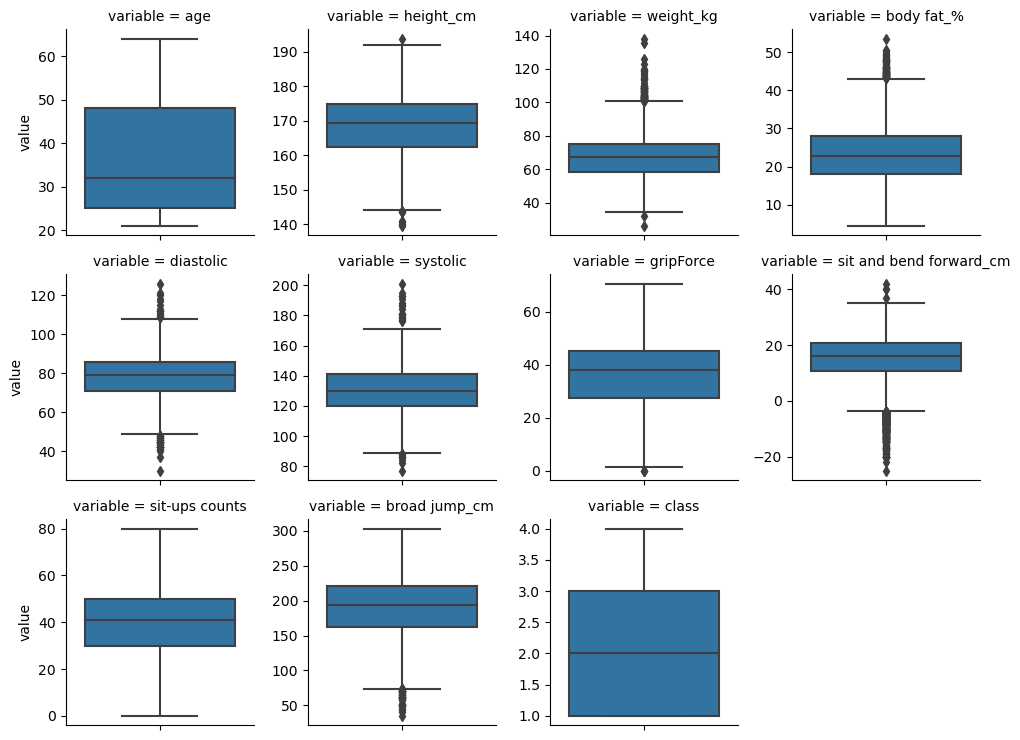

In [19]:
features = ['age', 'gender', 'height_cm',
       'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm',
       'sit-ups counts', 'broad jump_cm', 'class']
       
melted_df = pd.melt(new_df[features], id_vars = 'gender', value_vars = features)
g = sns.FacetGrid(data = melted_df, col="variable",  col_wrap=4, height=2.5 , sharey = False , sharex = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

#### changing the column names to more common and valid names:

In [20]:
new_df = new_df.rename(columns={"body fat_%":"body_fat", "height_cm":"height", "weight_kg":"weight", 
                                "sit and bend forward_cm":"bend_forward", "gripForce":"grip_force","sit-ups counts":"sit_ups"
                                , "broad jump_cm":"broad_jump"})

# 2. About the data

<div>
<img src="https://github.com/Matan97/Project1/blob/main/WhyDoExerciseNeedsVaryBetweenIndividuals.png?raw=true" width="500"/>
</div>

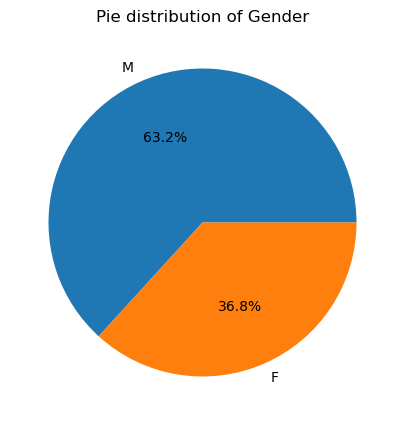

In [21]:
plt.figure(1, figsize=(5,5))
plt.title("Gender")
new_df['gender'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("") 
plt.title("Pie distribution of Gender")
plt.show()

Notice that the sample space contains more men than women

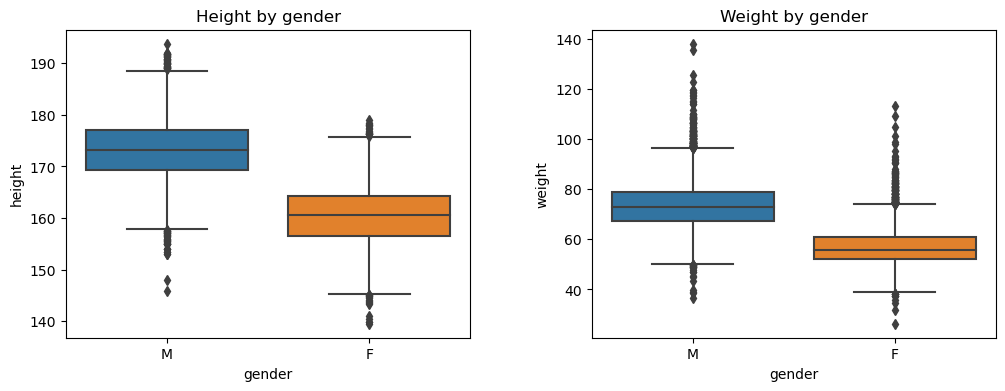

In [22]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.boxplot(x="gender" ,y = 'height' ,data=new_df, ax = ax[0])
sns.boxplot(x="gender" ,y = 'weight' ,data=new_df, ax = ax[1])
ax[0].set_title("Height by gender")
ax[1].set_title("Weight by gender")
plt.show()

Males tend to be taller and heavier than females.

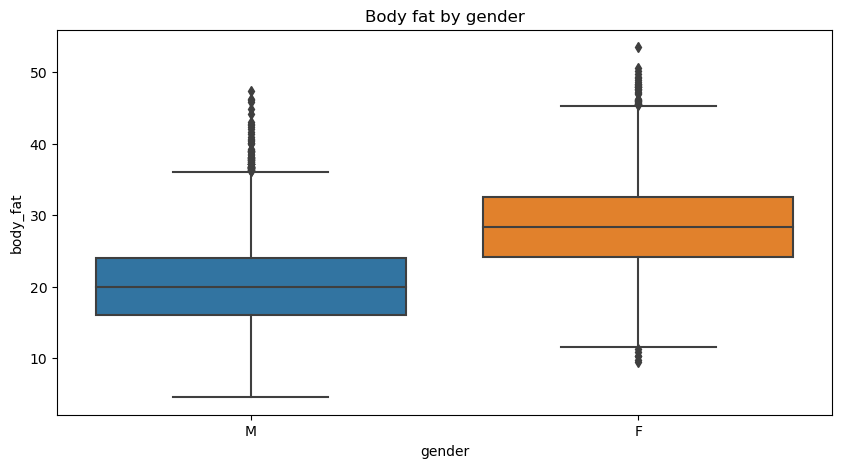

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x="gender", y="body_fat", data=new_df)
plt.title("Body fat by gender")
plt.show()

Females, on average, have a slightly higher body fat % than males.

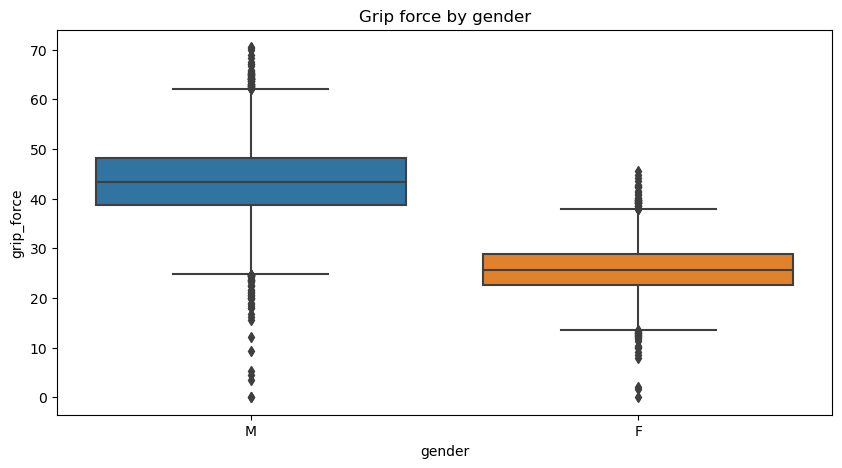

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x="gender", y="grip_force", data=new_df)
plt.title("Grip force by gender")
plt.show()

In [25]:
new_df.groupby("gender").mean()

,age,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
gender,,,,,,,,,,,
F,37.829263,160.501628,56.903256,28.477057,75.587302,124.002035,25.832711,18.850389,30.927350,153.592796,2.386447
M,36.151343,173.258750,73.579995,20.185655,80.693847,133.897764,43.445392,13.049357,44.938232,211.585860,2.565140


---

>## Insight 1 
>
>#### On average males tend to have a stronger grip force compared to females.

>

 

---

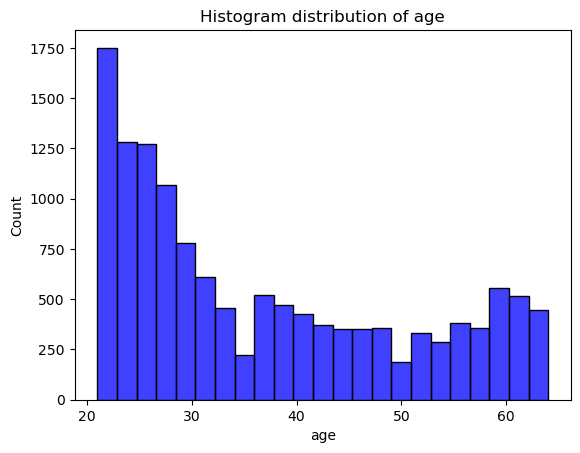

In [26]:
sns.histplot(x="age" ,data=new_df ,color='blue')
plt.title("Histogram distribution of age")
plt.show()

The age range ranges from 20 to 65,
Most of the examinee are 20-30 years old

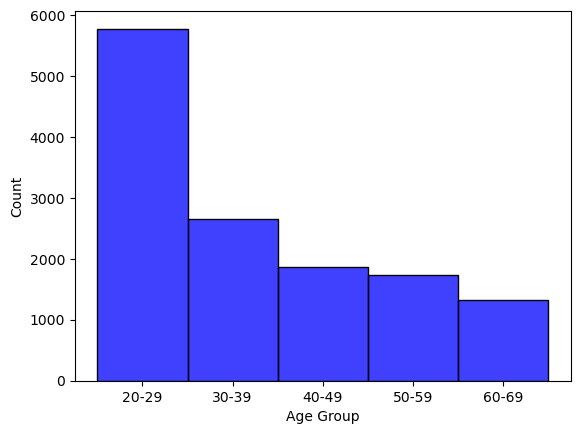

In [27]:
new_df=new_df[new_df.age != 0] 

new_df.loc[new_df["age"]<70 , "Age Group"]="60-69"
new_df.loc[new_df["age"]<60 , "Age Group"]="50-59"
new_df.loc[new_df["age"]<50 , "Age Group"]="40-49"
new_df.loc[new_df["age"]<40, "Age Group"]="30-39"
new_df.loc[new_df["age"]<30 , "Age Group"]="20-29"

sns.histplot(new_df['Age Group'].sort_values(), bins=30 ,color='blue')
plt.show()

We added an age group column

# 3. Correlations - patterns in the data

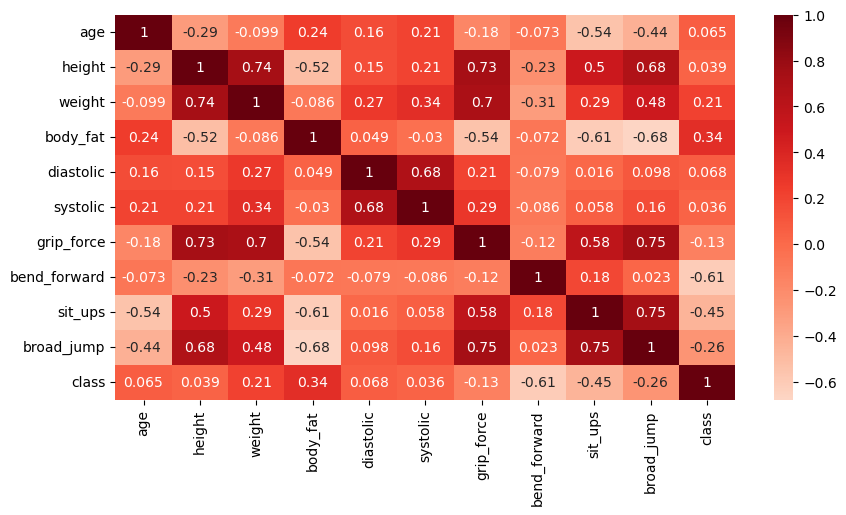

In [28]:
features = ['age', 'height',
       'weight', 'body_fat', 'diastolic',
       'systolic', 'grip_force', 'bend_forward',
       'sit_ups', 'broad_jump', 'class']
corrs = new_df[features].corr()
plt.figure(figsize=(10,5))  
sns.heatmap(corrs, cmap='Reds', center=0, annot = True)
plt.show()

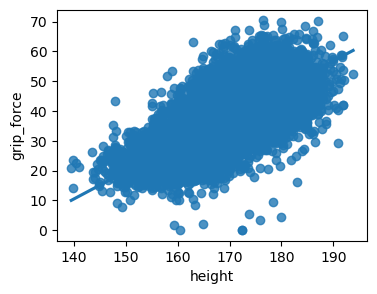

In [29]:
plt.figure(figsize=(4,3))
sns.regplot(x='height', y='grip_force', data=new_df);
plt.show()

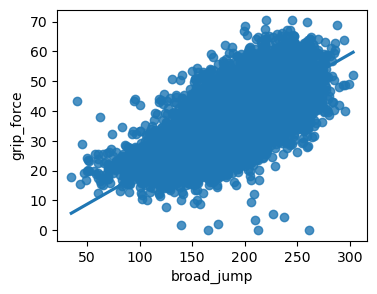

In [30]:
plt.figure(figsize=(4,3))
sns.regplot(x='broad_jump', y='grip_force', data=new_df);
plt.show()

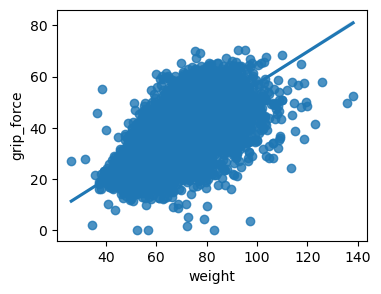

In [31]:
plt.figure(figsize=(4,3))
sns.regplot(x='weight', y='grip_force', data=new_df);
plt.show()

There is a strong correlation between  grip force, weight, height and broad jump. 
so we can unite them together.

In [32]:
group_grip = new_df.groupby("grip_force")[['height','weight', 'broad_jump']].mean().reset_index()

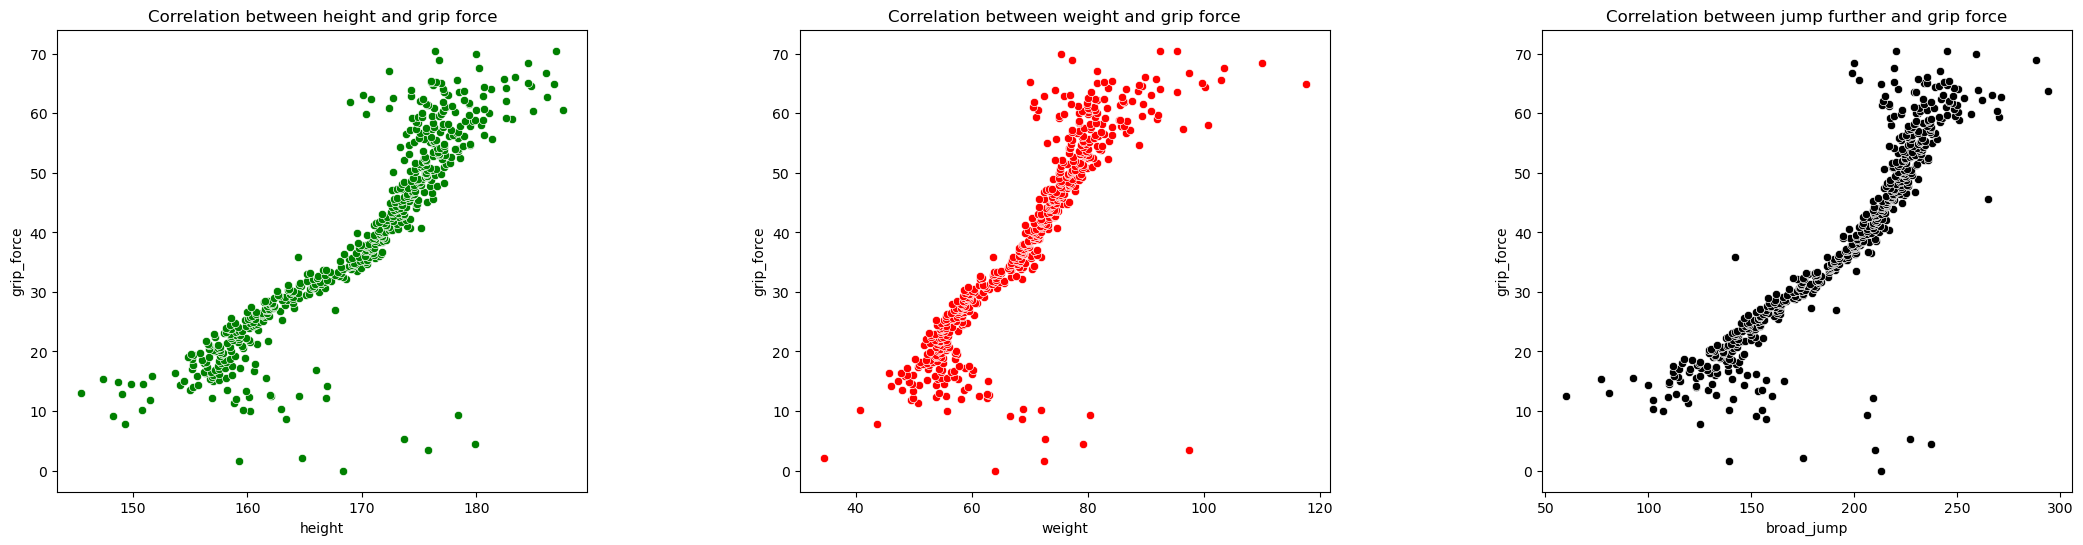

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(26,6))
sns.scatterplot(x="height" ,y = 'grip_force' ,data=group_grip ,ax = ax[0] ,color = 'green')
ax[0].set_title('Correlation between height and grip force')
sns.scatterplot(x="weight" ,y = 'grip_force' ,data=group_grip ,ax = ax[1] ,color = 'red')
ax[1].set_title('Correlation between weight and grip force')
sns.scatterplot(x="broad_jump" ,y = 'grip_force' ,data=group_grip ,ax = ax[2] ,color = 'black')
ax[2].set_title('Correlation between jump further and grip force')
plt.subplots_adjust(wspace = 0.4)
plt.show()

---
>
>## Insight 2: Grip force
>#### The heavier the weight, the higher the height and the farther the jump, correspondingly the grip force is stronger
> 
---

---
>
>## Insight 2: Grip force
>#### As the weight, height and jump increase, the grip force is correspondingly stronger
> 
---

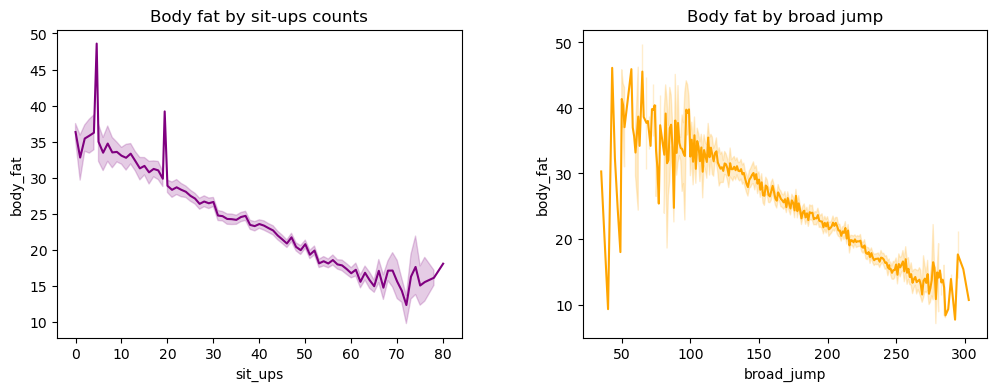

In [34]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.lineplot(x="sit_ups" ,y = 'body_fat' ,data=new_df, ax = ax[0] ,color = 'purple')
sns.lineplot(x="broad_jump" ,y = 'body_fat' ,data=new_df, ax = ax[1], color = 'orange')
ax[0].set_title("Body fat by sit-ups counts")
ax[1].set_title("Body fat by broad jump")
plt.show()

 From the negative correlation we can tell that as the performance in physical activities increases, the percentage of body fat decreases.

In [35]:
new_df[(new_df['body_fat']<10) & (new_df['broad_jump']<50)]

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class,Age Group
8749,44.0,M,178.8,72.7,9.3,94.0,148.0,43.4,21.9,48.0,40.0,1,40-49


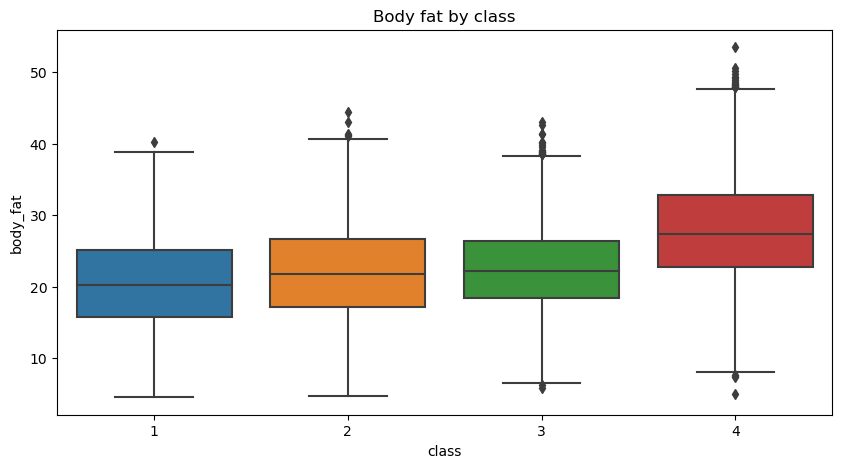

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x="class", y="body_fat", data=new_df)
plt.title("Body fat by class")
plt.show()

In [37]:
new_df.groupby("class")["body_fat"].mean()

class
1    20.533056
2    22.036240
3    22.649445
4    27.724285
Name: body_fat, dtype: float64

 People in Class A tend to have a lower body fat.

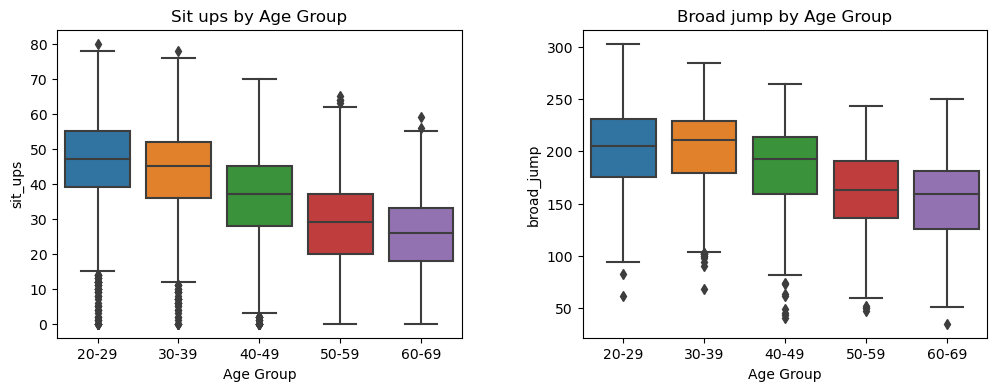

In [38]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.boxplot(x="Age Group" ,y = 'sit_ups' ,data=new_df, ax = ax[0])
ax[0].set_title("Sit ups by Age Group")
sns.boxplot(x="Age Group" ,y = 'broad_jump' ,data=new_df, ax = ax[1])
ax[1].set_title("Broad jump by Age Group")
plt.show()

In older age groups, a decline in performance in physical activities can be observed.

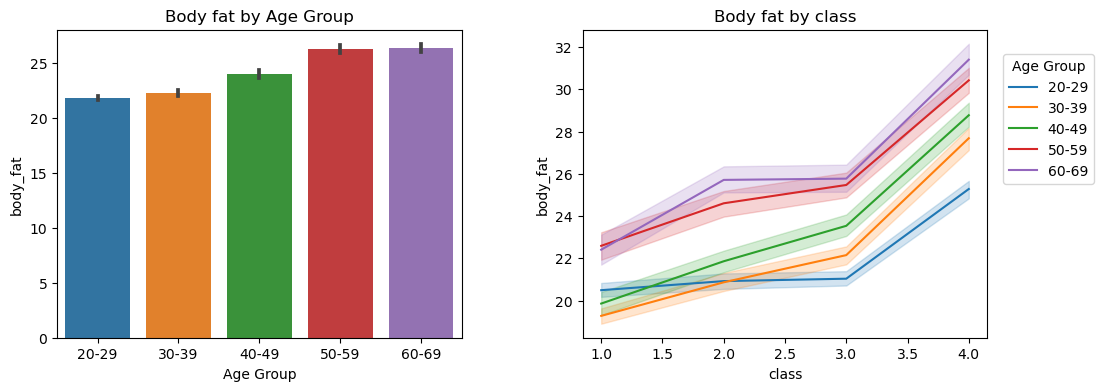

In [39]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.barplot(x="Age Group" ,y = 'body_fat' ,data=new_df,ax = ax[0])
ax[0].set_title("Body fat by Age Group")
sns.lineplot(x="class" ,y = 'body_fat' ,data=new_df, hue= 'Age Group' ,ax = ax[1])
plt.legend(title = 'Age Group', loc=(1.04,0.5))
ax[1].set_title("Body fat by class")
plt.show()

---
>
>## Insight 3: Young vs. Elderly - by body fat:
>#### In micro, it can be observed that adults engage in low physical activity compared to younger individuals, resulting in a higher percentage of body fat. In macro, the more active you are at any age , the lower your body fat percentage will be.
>
---

# 4. Categorical data

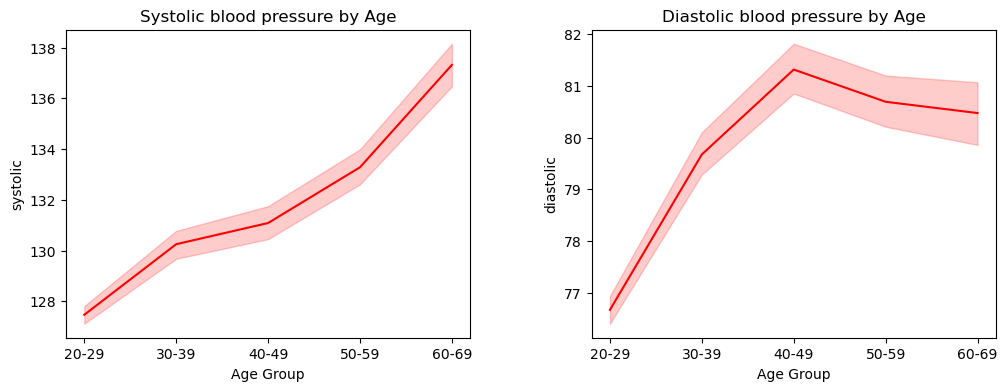

In [40]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.lineplot(x="Age Group" ,y = 'systolic' ,data=new_df, ax = ax[0], color = 'red')
sns.lineplot(x="Age Group" ,y = 'diastolic' ,data=new_df, ax = ax[1], color = 'red')
ax[0].set_title("Systolic blood pressure by Age")
ax[1].set_title("Diastolic blood pressure by Age")
plt.show()

You can see that high blood pressure is higher as you get older.

In [41]:
young_df = new_df[new_df['Age Group'] == '20-29']
old_df = new_df[new_df['Age Group'] == '60-69']

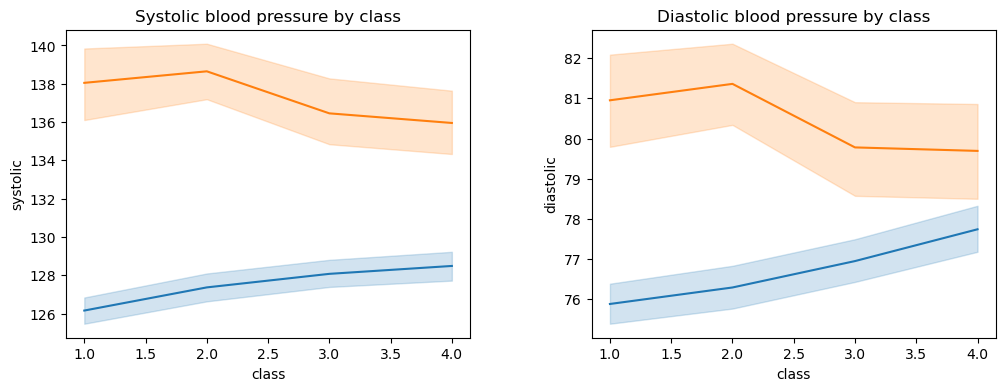

In [42]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.lineplot(x = 'class' , y = 'systolic', data = young_df , ax = ax[0])
sns.lineplot(x = 'class' , y = 'systolic', data = old_df,ax = ax[0])
sns.lineplot(x = 'class' , y = 'diastolic', data = young_df , ax = ax[1])
sns.lineplot(x = 'class' , y = 'diastolic', data = old_df,ax = ax[1])
ax[0].set_title("Systolic blood pressure by class")
ax[1].set_title("Diastolic blood pressure by class")
plt.show()

---
>
>## Insight 4: Young vs. Elderly - by blood pressure:
>#### 1. In the young age group, as your fitness level decreases, your blood pressure increases.
>#### 2. In the adult age group, as your fitness level decreases, your blood pressure decreases.
>
---

<div>
<img src="https://raw.githubusercontent.com/Matan97/Project1/main/young-old-athletes-doing-exercise_474601-2859.avif" width="500"/>
</div>

In [43]:
gender_df = new_df.groupby('gender')[[ 'height',
       'weight', 'body_fat', 'diastolic',
       'systolic', 'grip_force', 'bend_forward',
       'sit_ups', 'broad_jump', 'class']].mean().reset_index()
gender_df

,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
0,F,160.501628,56.903256,28.477057,75.587302,124.002035,25.832711,18.850389,30.927350,153.592796,2.386447
1,M,173.258750,73.579995,20.185655,80.693847,133.897764,43.445392,13.049357,44.938232,211.585860,2.565140


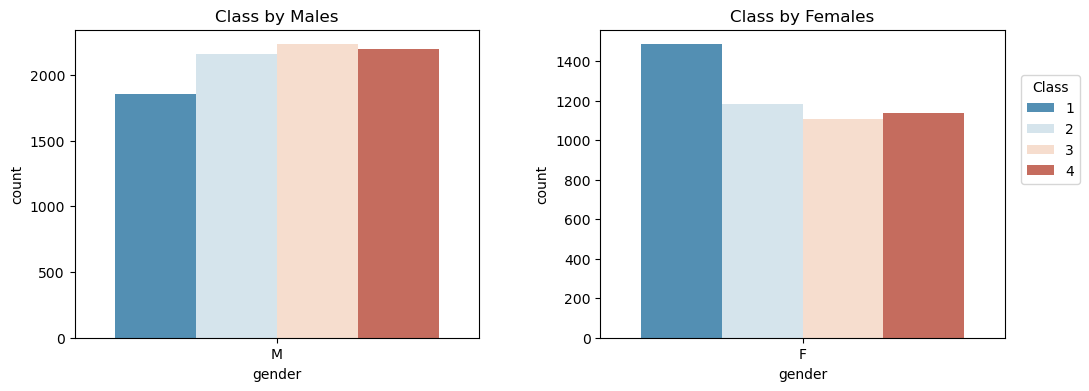

In [44]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.countplot(x='gender' , hue = 'class' ,data=new_df[new_df['gender'] == 'M'], palette='RdBu_r' ,ax = ax[0])
sns.countplot(x='gender' , hue = 'class' ,data=new_df[new_df['gender'] == 'F'], palette='RdBu_r'  ,ax = ax[1])
ax[0].legend_.remove()
ax[1].legend(title = 'Class', loc=(1.04,0.5))
ax[0].set_title("Class by Males")
ax[1].set_title("Class by Females")
plt.show()

---
>
>## Insight 5: Men vs. Women
>#### It can be seen that despite higher performance levels among men, the majority of women have higher fitness levels compared to men.
>
---

<div>
<img src="https://github.com/Matan97/Project1/blob/main/men%20women%20run.jpg?raw=true" width="500"/>
</div>

---
>
># Top insights:
>* In the young age group, as your fitness level decreases, your blood pressure increases.  As opposed to the adult age group, where your fitness level decreases, your blood pressure decreases.
>* The heavier the weight, the higher the height and the farther the jump, correspondingly the grip force is stronger.
>* In micro, it can be observed that adults engage in low physical activity compared to younger individuals,  resulting in a higher percentage of body fat. In macro, the more active you are at any age , the lower your body fat percentage will be.
>
---